In [6]:
import pandas as pd
import numpy as np

In [7]:
import string

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
#load the stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english') 

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [16]:
import pickle

Gaps i will try to remove
1. Most people focus on binary classification only
2. Implement explainable AI
3. Class Imbalance

In [17]:
df=pd.read_csv('Combined Data.csv')

In [18]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [19]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [20]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [21]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [22]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [25]:
df['status'].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution across dataset')

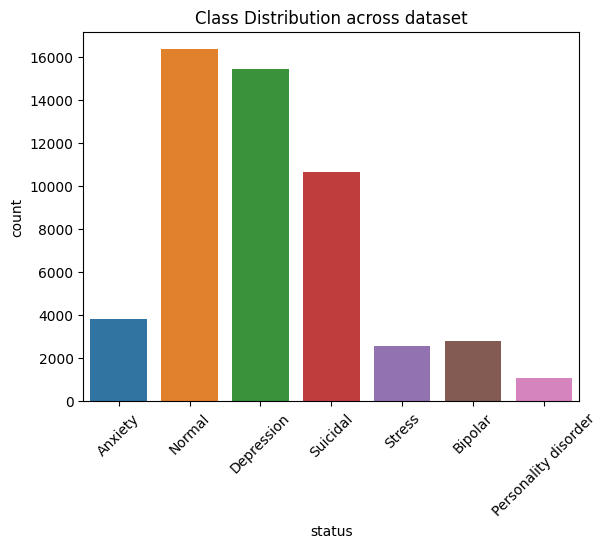

In [26]:
sns.countplot(data=df,x='status',hue='status')
plt.xticks(rotation=45)
plt.title('Class Distribution across dataset')

Observation 1: There is clear class imbalance. We can incorporate more data across classes like stress, bipolar, anxiety and personality disorder

1. Data Cleaning

A) Lowercasing

In [27]:
def lower(s):
    return s.lower()

In [28]:
df['statement']=df['statement'].apply(lower)

In [29]:
df

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"all wrong, back off dear, forward doubt. stay ...",Anxiety
3,i've shifted my focus to something else but i'...,Anxiety
4,"i'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,nobody takes me seriously i’ve (24m) dealt wit...,Anxiety
53039,"selfishness ""i don't feel very good, it's lik...",Anxiety
53040,is there any way to sleep better? i can't slee...,Anxiety
53041,"public speaking tips? hi, all. i have to give ...",Anxiety


B) Removing punctuation

In [30]:
remove=string.punctuation
def remove_punctuation(s):
    return s.translate(str.maketrans('','',remove))

In [31]:
df['statement']=df['statement'].apply(remove_punctuation)

In [32]:
df

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety
...,...,...
53038,nobody takes me seriously i’ve 24m dealt with ...,Anxiety
53039,selfishness i dont feel very good its like i ...,Anxiety
53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,public speaking tips hi all i have to give a p...,Anxiety


C) Removing Digits

In [33]:
def remove_digits(s):
    return s.translate(str.maketrans('','',string.digits))
df['statement']=df['statement'].apply(remove_digits)

In [34]:
df

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety
...,...,...
53038,nobody takes me seriously i’ve m dealt with de...,Anxiety
53039,selfishness i dont feel very good its like i ...,Anxiety
53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,public speaking tips hi all i have to give a p...,Anxiety


D) Extra Space removal

In [35]:
def remove_extra_space(text):   
    ans = " ".join(text.split())
    return ans

df['statement']=df['statement'].apply(remove_extra_space)

In [36]:
df

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety
...,...,...
53038,nobody takes me seriously i’ve m dealt with de...,Anxiety
53039,selfishness i dont feel very good its like i d...,Anxiety
53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,public speaking tips hi all i have to give a p...,Anxiety


E) Stop Words

In [37]:
def remove_stop_words(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    clean_tokens = [token for token in tokens if token not in stop_words]

    # Join the clean tokens into a single string
    clean_text = ' '.join(clean_tokens)

    return clean_text

In [38]:
df['statement']=df['statement'].apply(remove_stop_words)

In [39]:
df

,statement,status
0,oh gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,wrong back dear forward doubt stay restless re...,Anxiety
3,ive shifted focus something else im still worried,Anxiety
4,im restless restless month boy mean,Anxiety
...,...,...
53038,nobody takes seriously ’ dealt depressionanxie...,Anxiety
53039,selfishness dont feel good like dont belong wo...,Anxiety
53040,way sleep better cant sleep nights meds didnt ...,Anxiety
53041,public speaking tips hi give presentation work...,Anxiety


EDA 

Word Cloud

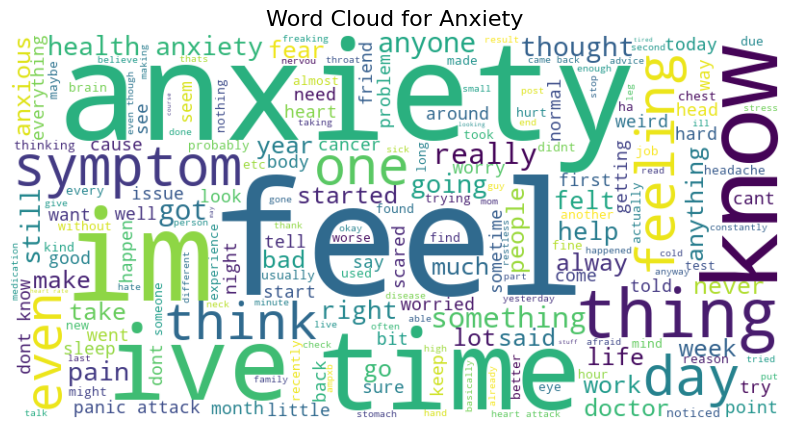

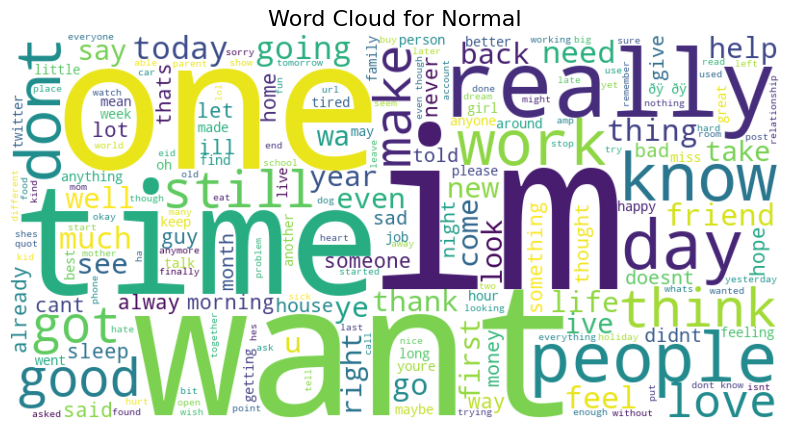

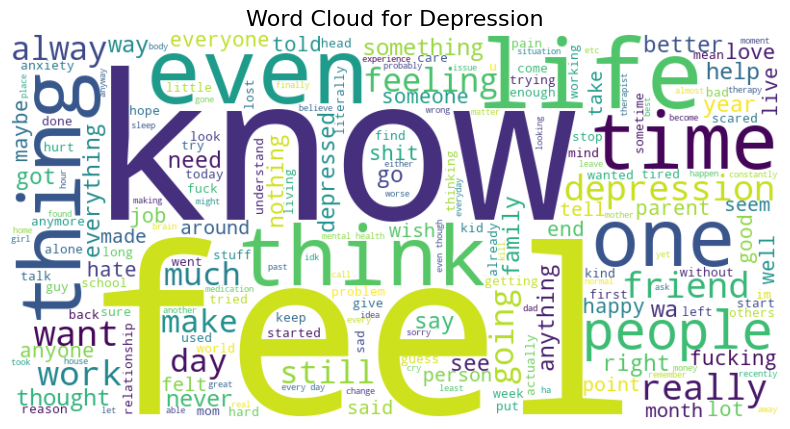

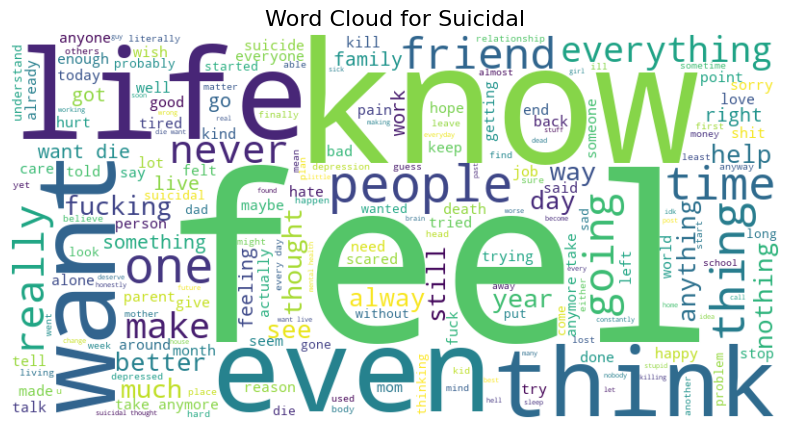

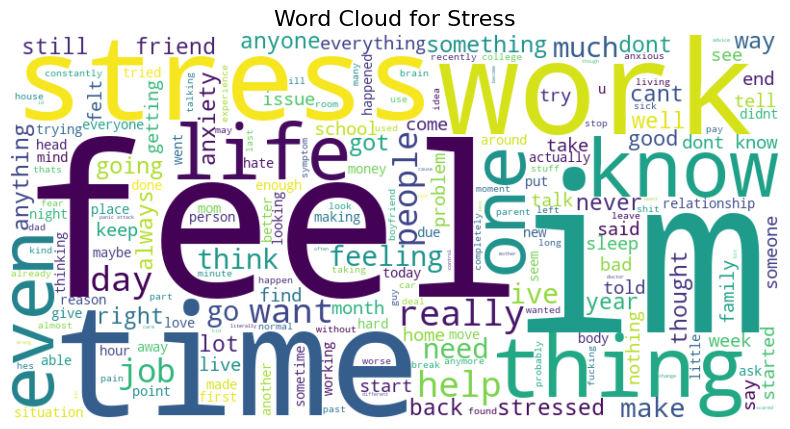

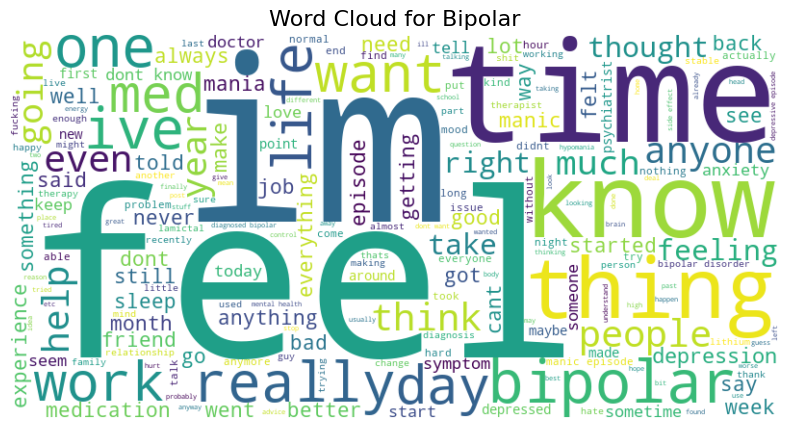

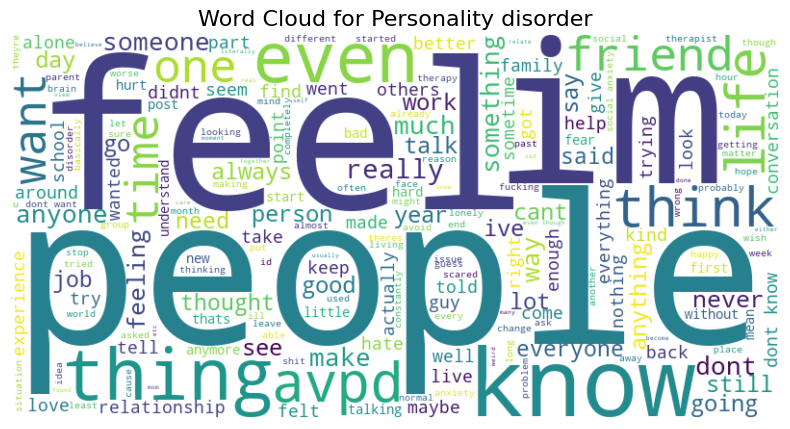

In [40]:
for status in df['status'].unique():
    # Combine all text for this status
    class_text = " ".join(df[df['status'] == status]['statement'])
    
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color="white").generate(class_text)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {status}", fontsize=16)
    plt.show()

In [41]:
X=df['statement']
Y=df['status']

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
print(X_train.shape)
print()
print(Y_train.shape)
print()
print(X_test.shape)
print()
print(Y_test.shape)

(42144,)

(42144,)

(10537,)

(10537,)


Applying Bag Of Words

In [44]:
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train)
X_test_bow=bow.transform(X_test)

Bag of Words + Machine Learning Algorithms

1. Logistic Regression

In [45]:
lr=LogisticRegression()
lr.fit(X_train_bow,Y_train)
Y_pred_lr=lr.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_lr))

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      precision    recall  f1-score   support

             Anxiety       0.79      0.75      0.77       807
             Bipolar       0.80      0.73      0.77       542
          Depression       0.71      0.68      0.69      3118
              Normal       0.86      0.95      0.90      3213
Personality disorder       0.72      0.62      0.67       225
              Stress       0.56      0.47      0.51       520
            Suicidal       0.63      0.62      0.63      2112

            accuracy                           0.75     10537
           macro avg       0.73      0.69      0.71     10537
        weighted avg       0.74      0.75      0.74     10537



precision and recall low for stress and suicidal. There is class imbalance so that's the reason

2. Support Vector Machine

In [ ]:
svm=SVC()
svm.fit(X_train_bow,Y_train)
Y_pred_svm=svm.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_svm))

3. Decision Tree

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_bow,Y_train)
Y_pred_dtc=dtc.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_dtc))

                      precision    recall  f1-score   support

             Anxiety       0.64      0.59      0.61       807
             Bipolar       0.63      0.57      0.60       542
          Depression       0.60      0.59      0.60      3118
              Normal       0.81      0.87      0.84      3213
Personality disorder       0.58      0.49      0.53       225
              Stress       0.40      0.36      0.38       520
            Suicidal       0.51      0.51      0.51      2112

            accuracy                           0.65     10537
           macro avg       0.60      0.57      0.58     10537
        weighted avg       0.64      0.65      0.64     10537



4. Random Forest

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train_bow,Y_train)
Y_pred_rfc=rfc.predict(X_test_bow)  
print(classification_report(Y_test,Y_pred_rfc))

                      precision    recall  f1-score   support

             Anxiety       0.92      0.45      0.61       807
             Bipolar       0.99      0.34      0.50       542
          Depression       0.54      0.80      0.65      3118
              Normal       0.77      0.95      0.85      3213
Personality disorder       1.00      0.29      0.45       225
              Stress       1.00      0.18      0.30       520
            Suicidal       0.66      0.40      0.50      2112

            accuracy                           0.67     10537
           macro avg       0.84      0.49      0.55     10537
        weighted avg       0.72      0.67      0.65     10537



5. K Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_bow,Y_train)   
Y_pred_knn=knn.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_knn))

                      precision    recall  f1-score   support

             Anxiety       0.61      0.31      0.41       807
             Bipolar       0.72      0.07      0.13       542
          Depression       0.58      0.36      0.45      3118
              Normal       0.45      0.99      0.62      3213
Personality disorder       0.56      0.04      0.07       225
              Stress       0.47      0.05      0.09       520
            Suicidal       0.53      0.25      0.34      2112

            accuracy                           0.49     10537
           macro avg       0.56      0.29      0.30     10537
        weighted avg       0.53      0.49      0.43     10537



6. Gradient Boosting

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_bow,Y_train)
Y_pred_gbc=gbc.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_gbc))

                      precision    recall  f1-score   support

             Anxiety       0.77      0.63      0.69       807
             Bipolar       0.90      0.64      0.75       542
          Depression       0.68      0.69      0.69      3118
              Normal       0.74      0.96      0.84      3213
Personality disorder       0.85      0.42      0.56       225
              Stress       0.67      0.35      0.46       520
            Suicidal       0.68      0.56      0.62      2112

            accuracy                           0.72     10537
           macro avg       0.76      0.61      0.66     10537
        weighted avg       0.72      0.72      0.71     10537



7. Navie Bayes

In [ ]:
nb=MultinomialNB()
nb.fit(X_train_bow,Y_train)
Y_pred_nb=nb.predict(X_test_bow)
print(classification_report(Y_test,Y_pred_nb))

                      precision    recall  f1-score   support

             Anxiety       0.72      0.74      0.73       807
             Bipolar       0.71      0.63      0.67       542
          Depression       0.50      0.76      0.60      3118
              Normal       0.96      0.63      0.76      3213
Personality disorder       0.91      0.17      0.29       225
              Stress       0.67      0.18      0.28       520
            Suicidal       0.64      0.65      0.64      2112

            accuracy                           0.65     10537
           macro avg       0.73      0.54      0.57     10537
        weighted avg       0.71      0.65      0.65     10537



Applying TF- IDF + Machine Learning Algorithms

In [ ]:
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

1. Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_tfidf,Y_train)
Y_pred_lr=lr.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_lr))

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      precision    recall  f1-score   support

             Anxiety       0.81      0.75      0.78       807
             Bipolar       0.87      0.68      0.76       542
          Depression       0.69      0.74      0.71      3118
              Normal       0.83      0.95      0.89      3213
Personality disorder       0.90      0.44      0.59       225
              Stress       0.69      0.39      0.50       520
            Suicidal       0.68      0.64      0.66      2112

            accuracy                           0.76     10537
           macro avg       0.78      0.65      0.70     10537
        weighted avg       0.76      0.76      0.75     10537



2. Support Vector Machine

In [ ]:
svm=SVC()
svm.fit(X_train_tfidf,Y_train)
Y_pred_svm=svm.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_svm))

                      precision    recall  f1-score   support

             Anxiety       0.83      0.79      0.81       807
             Bipolar       0.92      0.69      0.79       542
          Depression       0.69      0.75      0.72      3118
              Normal       0.85      0.96      0.90      3213
Personality disorder       0.93      0.44      0.60       225
              Stress       0.75      0.41      0.53       520
            Suicidal       0.71      0.65      0.68      2112

            accuracy                           0.77     10537
           macro avg       0.81      0.67      0.72     10537
        weighted avg       0.77      0.77      0.77     10537



3. Decision Tree

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_tfidf,Y_train)
Y_pred_dtc=dtc.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_dtc))

                      precision    recall  f1-score   support

             Anxiety       0.62      0.58      0.60       807
             Bipolar       0.59      0.57      0.58       542
          Depression       0.61      0.59      0.60      3118
              Normal       0.83      0.87      0.85      3213
Personality disorder       0.58      0.50      0.54       225
              Stress       0.42      0.38      0.40       520
            Suicidal       0.51      0.53      0.52      2112

            accuracy                           0.65     10537
           macro avg       0.60      0.58      0.58     10537
        weighted avg       0.65      0.65      0.65     10537



4. Random Forest

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train_tfidf,Y_train)
Y_pred_rfc=rfc.predict(X_test_tfidf)  
print(classification_report(Y_test,Y_pred_rfc))

                      precision    recall  f1-score   support

             Anxiety       0.91      0.49      0.64       807
             Bipolar       0.99      0.37      0.53       542
          Depression       0.55      0.81      0.66      3118
              Normal       0.79      0.95      0.86      3213
Personality disorder       1.00      0.29      0.45       225
              Stress       0.98      0.18      0.30       520
            Suicidal       0.69      0.41      0.52      2112

            accuracy                           0.68     10537
           macro avg       0.84      0.50      0.56     10537
        weighted avg       0.73      0.68      0.66     10537



5. K Nearest Neighbor

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_tfidf,Y_train)   
Y_pred_knn=knn.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_knn))

                      precision    recall  f1-score   support

             Anxiety       0.89      0.07      0.13       807
             Bipolar       0.00      0.00      0.00       542
          Depression       0.65      0.01      0.03      3118
              Normal       0.31      0.99      0.47      3213
Personality disorder       0.33      0.00      0.01       225
              Stress       1.00      0.01      0.02       520
            Suicidal       0.63      0.02      0.04      2112

            accuracy                           0.32     10537
           macro avg       0.55      0.16      0.10     10537
        weighted avg       0.54      0.32      0.17     10537



6. Gradient Boosting

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train_tfidf,Y_train)
Y_pred_gbc=gbc.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_gbc))

                      precision    recall  f1-score   support

             Anxiety       0.78      0.65      0.71       807
             Bipolar       0.89      0.65      0.76       542
          Depression       0.67      0.70      0.69      3118
              Normal       0.75      0.95      0.84      3213
Personality disorder       0.81      0.44      0.57       225
              Stress       0.67      0.38      0.49       520
            Suicidal       0.68      0.57      0.62      2112

            accuracy                           0.72     10537
           macro avg       0.75      0.62      0.67     10537
        weighted avg       0.72      0.72      0.71     10537



7. Naive Bayes

In [ ]:
nb=MultinomialNB()
nb.fit(X_train_tfidf,Y_train)
Y_pred_nb=nb.predict(X_test_tfidf)
print(classification_report(Y_test,Y_pred_nb))

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

             Anxiety       0.96      0.10      0.18       807
             Bipolar       0.80      0.01      0.01       542
          Depression       0.38      0.98      0.54      3118
              Normal       0.95      0.60      0.74      3213
Personality disorder       0.00      0.00      0.00       225
              Stress       1.00      0.01      0.01       520
            Suicidal       0.79      0.12      0.21      2112

            accuracy                           0.51     10537
           macro avg       0.70      0.26      0.24     10537
        weighted avg       0.72      0.51      0.44     10537



c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BOW GRAPH

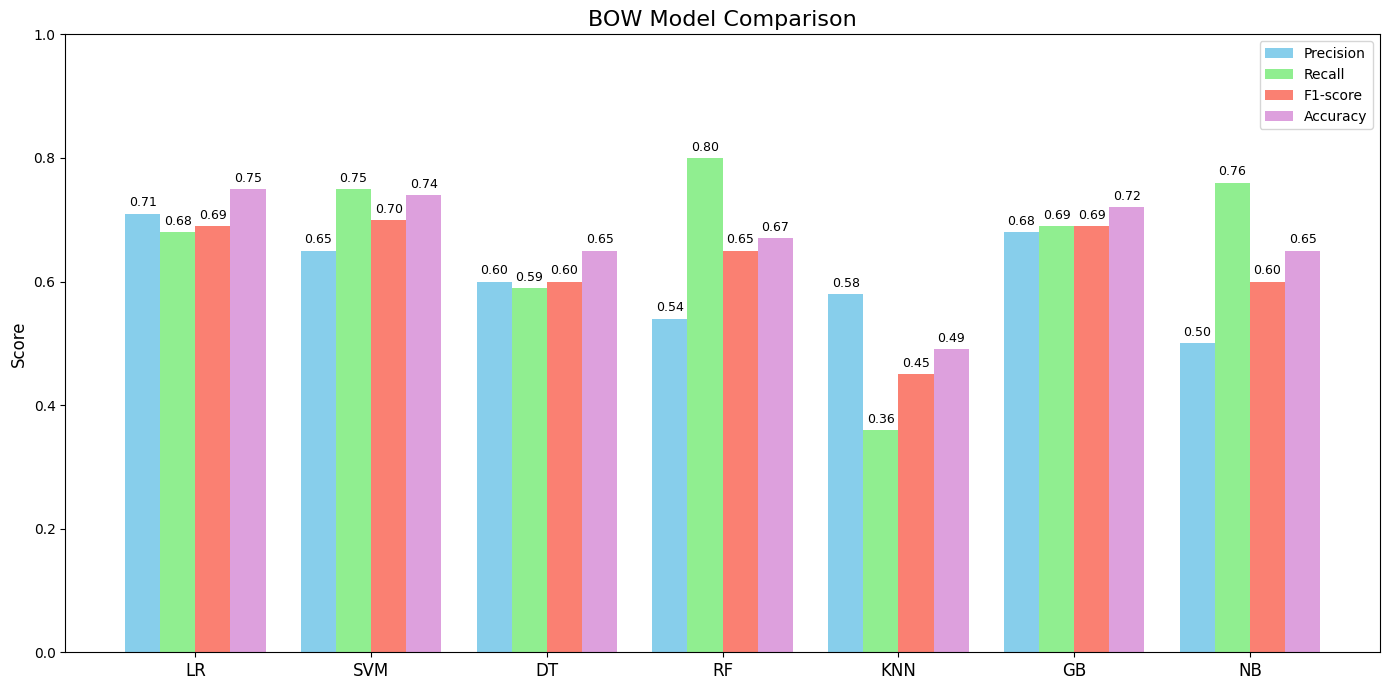

In [ ]:

# Model names
models = ['LR', 'SVM', 'DT', 'RF', 'KNN', 'GB', 'NB']

# Metrics for Depression class from your data
precision = [0.71, 0.65, 0.60, 0.54, 0.58, 0.68, 0.50]
recall =    [0.68, 0.75, 0.59, 0.80, 0.36, 0.69, 0.76]
f1 =        [0.69, 0.70, 0.60, 0.65, 0.45, 0.69, 0.60]
accuracy =  [0.75, 0.74, 0.65, 0.67, 0.49, 0.72, 0.65]  # overall accuracy for reference

x = np.arange(len(models))
width = 0.2  # Increased bar width

fig, ax = plt.subplots(figsize=(14, 7))

# Adjusting bar positions to be grouped for each model
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + 0.5*width, f1, width, label='F1-score', color='salmon')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='plum')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Score', fontsize=12)
ax.set_title('BOW Model Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim(0, 1)
ax.legend(fontsize=10)

# Annotate bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.savefig("model_comparison_chart.png")

<h1> Rahne do multi class for NTCC itti saari class itte saare metrics bahut hard ho jaega hatao be. Binary class kro sirf bahut hai for NTCC.

TFIDF+GRAPH

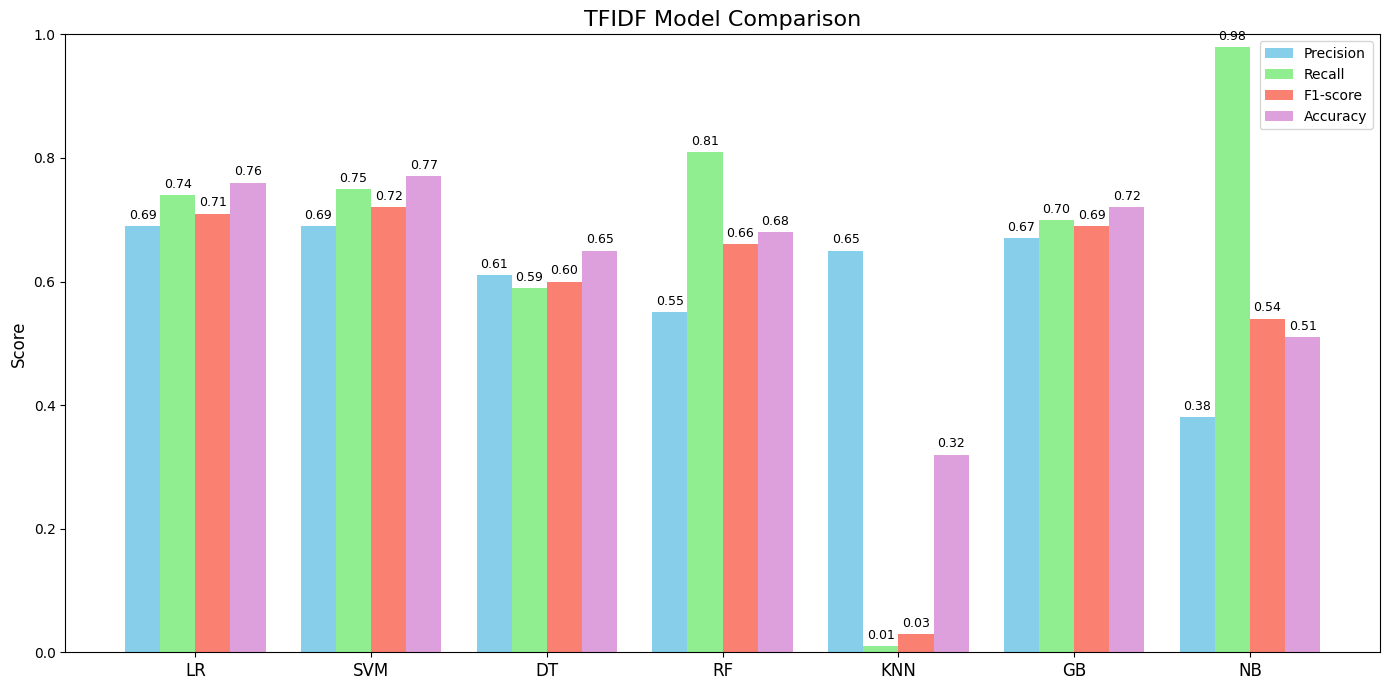

In [ ]:

# Model names
models = ['LR', 'SVM', 'DT', 'RF', 'KNN', 'GB', 'NB']

# Metrics for Depression class from your data
precision = [0.69, 0.69, 0.61, 0.55, 0.65, 0.67, 0.38]
recall =    [0.74, 0.75, 0.59, 0.81, 0.01, 0.70, 0.98]
f1 =        [0.71, 0.72, 0.60, 0.66, 0.03, 0.69, 0.54]
accuracy =  [0.76, 0.77, 0.65, 0.68, 0.32, 0.72, 0.51]  # overall accuracy for reference

x = np.arange(len(models))
width = 0.2  # Increased bar width

fig, ax = plt.subplots(figsize=(14, 7))

# Adjusting bar positions to be grouped for each model
rects1 = ax.bar(x - 1.5*width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x - 0.5*width, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + 0.5*width, f1, width, label='F1-score', color='salmon')
rects4 = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='plum')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Score', fontsize=12)
ax.set_title('TFIDF Model Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim(0, 1)
ax.legend(fontsize=10)

# Annotate bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.savefig("model_comparison_chart.png")

Going with LR+TFIDF

In [ ]:
pickle.dump(tfidf, open("tfidf.pickle", "wb"))
pickle.dump(lr, open("model.pickle", "wb"))

In [ ]:
statement = ["I feel hopeless and worthless."]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Depression']


In [ ]:
#anxiety statement = ["I feel anxious and nervous."]
statement = ["I feel anxious and nervous."]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Anxiety']


In [ ]:
# Bipolar statement = ["I have extreme mood swings."]
statement = ["I have extreme mood swings."]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Normal']


In [ ]:
#personality disorder statement = ["I have trouble maintaining relationships."]
statement = ["I have trouble maintaining relationships."]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Normal']


In [ ]:
#stress statement = ["I feel overwhelmed and stressed."]
statement = ["The high-pressure sales targets are a constant source of stress for the team"]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Normal']


stress mai data kam hai

In [ ]:
#personality disorder statement = ["I have trouble maintaining relationships."]
statement = ["I have trouble maintaining relationships."]
vect = tfidf.transform(statement).toarray() 
pred = lr.predict(vect)
print(pred)

['Normal']


In [ ]:
#suicidal statement = ["I have thoughts of ending my life."]
statement = ["I have thoughts of ending my life."]
vect = tfidf.transform(statement).toarray()
pred = lr.predict(vect)
print(pred)

['Normal']


# jisme data kam hai vaha issue hai will use different dataset